## This notebook contains the data wrangling and analysis for our second driving question: Do I have more steps on average during the weekend in comparison to a weekday?

In [1]:
#import libraries we'll be using
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#import data sets
person1 = pd.read_csv('person1-step-data.csv')
person2 = pd.read_csv('person2-step-data.csv')

In [3]:
#drop na values
df1 = person1.dropna()
df2 = person2.dropna()

In [4]:
#generate datetime column from the Date and Hour columns
def gen_datetime(row):
    h = row['Hour']
    if h < 10:
        h = '-' + str(0) + str(h)
    else:
        h = '-' + str(h)
    return pd.to_datetime(row['Date'] + h, format='%Y-%m-%d-%H')

df1['Datetime'] = df1.apply(gen_datetime, axis=1)
df2['Datetime'] = df2.apply(gen_datetime, axis=1)

In [5]:
#delete Date and Hour columns
df1 = df1.drop(columns=['Date', 'Hour'])
df2 = df2.drop(columns=['Date', 'Hour'])

In [6]:
#group by Datetime
gdf1 = df1.groupby('Datetime')
gdf2 = df2.groupby('Datetime')

In [7]:
#For data set 1, sum Count variable hourly, so there are no two rows with the same date and time
keys1 = gdf1.groups.keys()
rows1 = []
for i in keys1:
    rows1.append([i, gdf1.get_group(i)['Count'].sum()])

In [8]:
#For data set 2, sum Count variable hourly, so there are no two rows with the same date and time
keys2 = gdf2.groups.keys()
rows2 = []
for i in keys2:
    rows2.append([i, gdf2.get_group(i)['Count'].sum()])

In [9]:
#Create new DataFrames from summed count data
df1_hourly = pd.DataFrame(rows1, columns=['Timestamp', 'Count'])
df2_hourly = pd.DataFrame(rows2, columns=['Timestamp', 'Count'])

In [10]:
#add Day of the Week column
def gen_dayofweek(row):
    return row['Timestamp'].weekday()
df1_hourly['Day of Week'] = df1_hourly.apply(gen_dayofweek, axis=1)
df2_hourly['Day of Week'] = df2_hourly.apply(gen_dayofweek, axis=1)

In [11]:
#add Is Weekday column
def gen_isweekday(row):
    if row['Day of Week'] < 5:
        return True
    else:
        return False
df1_hourly['Is Weekday'] = df1_hourly.apply(gen_isweekday, axis=1)
df2_hourly['Is Weekday'] = df2_hourly.apply(gen_isweekday, axis=1)

In [12]:
df1_hourly

,Timestamp,Count,Day of Week,Is Weekday
0,2014-12-07 08:00:00,941,6,False
1,2014-12-07 09:00:00,408,6,False
2,2014-12-07 10:00:00,157,6,False
3,2014-12-07 11:00:00,1017,6,False
4,2014-12-07 14:00:00,137,6,False
...,...,...,...,...
19884,2021-09-22 12:00:00,305,2,True
19885,2021-09-22 13:00:00,237,2,True
19886,2021-09-22 14:00:00,9,2,True
19887,2021-09-22 17:00:00,3560,2,True


In [13]:
df2_hourly

,Timestamp,Count,Day of Week,Is Weekday
0,2014-11-29 06:00:00,28,5,False
1,2014-11-29 12:00:00,207,5,False
2,2014-11-29 13:00:00,1621,5,False
3,2014-11-29 14:00:00,1045,5,False
4,2014-11-29 15:00:00,219,5,False
...,...,...,...,...
35169,2021-09-22 11:00:00,165,2,True
35170,2021-09-22 12:00:00,365,2,True
35171,2021-09-22 13:00:00,198,2,True
35172,2021-09-22 14:00:00,143,2,True


In [14]:
#add a Date column to a copy of the hourly DataFrame
def timestamp_to_date(row):
    return row['Timestamp'].date()
df1_daily = df1_hourly.copy()
df2_daily = df2_hourly.copy()
df1_daily['Date'] = df1_hourly.apply(timestamp_to_date, axis=1)
df2_daily['Date'] = df2_hourly.apply(timestamp_to_date, axis=1)
#remove timestamp column
df1_daily = df1_daily.drop(columns = ['Timestamp'])
df2_daily = df2_daily.drop(columns = ['Timestamp'])
#group by date
gdf1_daily = df1_daily.groupby('Date')
gdf2_daily = df2_daily.groupby('Date')

In [15]:
#For data set 1, sum Count variable daily, so there are no two rows with the same date
keys1 = gdf1_daily.groups.keys()
rows1 = []
for i in keys1:
    rows1.append([i, gdf1_daily.get_group(i)['Count'].sum(), gdf1_daily.get_group(i).iloc[0]['Day of Week'], gdf1_daily.get_group(i).iloc[0]['Is Weekday']])

In [16]:
#For data set 2, sum Count variable daily, so there are no two rows with the same date
keys2 = gdf2_daily.groups.keys()
rows2 = []
for i in keys2:
    rows2.append([i, gdf2_daily.get_group(i)['Count'].sum(), gdf2_daily.get_group(i).iloc[0]['Day of Week'], gdf2_daily.get_group(i).iloc[0]['Is Weekday']])

In [17]:
#create new dataframes from summed Count data
df1_daily = pd.DataFrame(rows1, columns=['Date', 'Count', 'Day of Week', 'Is Weekday'])
df2_daily = pd.DataFrame(rows2, columns=['Date', 'Count', 'Day of Week', 'Is Weekday'])

In [18]:
df1_daily

,Date,Count,Day of Week,Is Weekday
0,2014-12-07,2693,6,False
1,2014-12-08,6567,0,True
2,2014-12-09,6879,1,True
3,2014-12-10,7845,2,True
4,2014-12-11,916,3,True
...,...,...,...,...
2290,2021-09-18,11572,5,False
2291,2021-09-19,10789,6,False
2292,2021-09-20,8800,0,True
2293,2021-09-21,17071,1,True


In [19]:
df2_daily

,Date,Count,Day of Week,Is Weekday
0,2014-11-29,12464,5,False
1,2014-11-30,2759,6,False
2,2014-12-01,6672,0,True
3,2014-12-02,9658,1,True
4,2014-12-03,1709,2,True
...,...,...,...,...
2485,2021-09-18,15250,5,False
2486,2021-09-19,19358,6,False
2487,2021-09-20,7563,0,True
2488,2021-09-21,14232,1,True


In [36]:
#group both datasets by day of the week
gdf1_daily = df1_daily.groupby('Day of Week')
gdf2_daily = df2_daily.groupby('Day of Week')
#create keys
dkeys1 = gdf1_daily.groups.keys()
dkeys2 = gdf2_daily.groups.keys()
#create dict to translate weekday numbers to names
daydict = {0:'Mon', 1:'Tues', 2:'Weds', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'}

In [37]:
#put mean per day data in new df for graphing. Get SEM
day_mean_data1 = []
day_mean_data2 = []
for i in dkeys1:
    day_mean_data1.append([daydict[i], gdf1_daily.get_group(i)['Count'].mean(), gdf1_daily.get_group(i)['Count'].sem()])
for i in dkeys2:
    day_mean_data2.append([daydict[i], gdf2_daily.get_group(i)['Count'].mean(), gdf2_daily.get_group(i)['Count'].sem()])
day_mean_df1 = pd.DataFrame(day_mean_data1, columns = ['Day', 'Mean Steps', 'SEM'])
day_mean_df2 = pd.DataFrame(day_mean_data2, columns = ['Day', 'Mean Steps', 'SEM'])
#sort values in descending order
day_mean_df1 = day_mean_df1.sort_values('Mean Steps', ascending=False)
day_mean_df2 = day_mean_df2.sort_values('Mean Steps', ascending=False)

In [38]:
#show means per day for person1 data set
day_mean_df1

,Day,Mean Steps,SEM
3,Thurs,7034.276471,414.797480
6,Sun,6783.230284,336.442982
4,Fri,6424.283626,316.143906
2,Weds,6300.564565,280.769149
5,Sat,6111.533101,310.845323
1,Tues,6046.846608,298.956101
0,Mon,6004.833828,343.208084


In [39]:
#show means per day for person2 data set
day_mean_df2

,Day,Mean Steps,SEM
6,Sun,15901.306180,384.042860
1,Tues,14603.320225,439.083670
3,Thurs,14362.374648,335.633082
4,Fri,14236.408451,344.278649
2,Weds,13848.317416,353.043070
0,Mon,13080.457865,331.018980
5,Sat,11692.351124,384.393061


In [32]:
#group both datasets by weekend or weekday
gdf1_daily = df1_daily.groupby('Is Weekday')
gdf2_daily = df2_daily.groupby('Is Weekday')
#create keys
dkeys1 = gdf1_daily.groups.keys()
dkeys2 = gdf2_daily.groups.keys()
#create dict to translate True/False to weekday/weekend
weekdict = {True:'Weekday', False:'Weekend'}

In [34]:
#put mean steps into new df for graphing, weekday vs weekend. Get SEM
weekday_mean_data1 = []
weekday_mean_data2 = []
for i in dkeys1:
    weekday_mean_data1.append([weekdict[i], gdf1_daily.get_group(i)['Count'].mean(), gdf1_daily.get_group(i)['Count'].sem()])
for i in dkeys2:
    weekday_mean_data2.append([weekdict[i], gdf2_daily.get_group(i)['Count'].mean(), gdf2_daily.get_group(i)['Count'].sem()])
weekday_mean_df1 = pd.DataFrame(weekday_mean_data1, columns = ['Period', 'Mean Steps', 'SEM'])
weekday_mean_df2 = pd.DataFrame(weekday_mean_data2, columns = ['Period', 'Mean Steps', 'SEM'])

In [35]:
weekday_mean_df1

,Period,Mean Steps,SEM
0,Weekend,6464.062914,230.424351
1,Weekday,6363.309876,149.665736


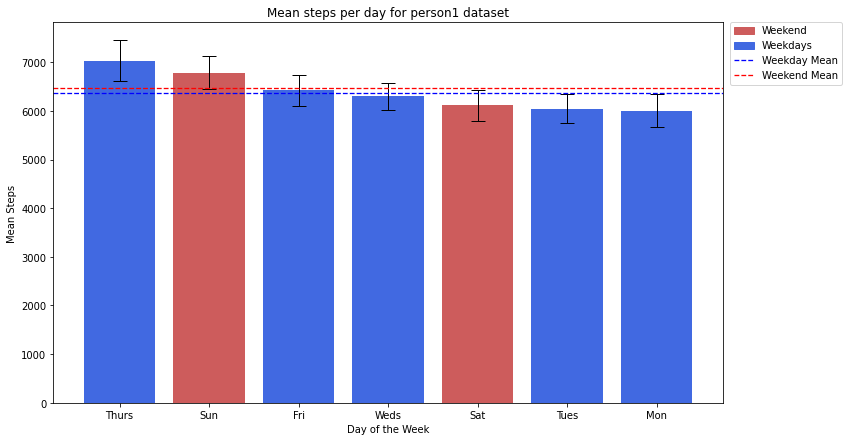

In [56]:
#graph means per day for person1 data set with error bars
plt.bar(day_mean_df1['Day'], day_mean_df1['Mean Steps'], color = ['royalblue', 'indianred', 'royalblue', 'royalblue', 'indianred', 'royalblue', 'royalblue'])
plt.errorbar(day_mean_df1['Day'], day_mean_df1['Mean Steps'], yerr=day_mean_df1['SEM'], capsize=7, elinewidth=1, markeredgewidth=1, color = 'black', ls='none')
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Mean Steps')
plt.title('Mean steps per day for person1 dataset')
#add weekday and weekend means
h1 = weekday_mean_df1[weekday_mean_df1['Period']=='Weekday']['Mean Steps'][1]
h2 = weekday_mean_df1[weekday_mean_df1['Period']=='Weekend']['Mean Steps'][0]
hline1 = plt.axhline(y=h1,linewidth=1.3, linestyle='--', label='Weekday Mean', color='blue')
hline2 = plt.axhline(y=h2,linewidth=1.3, linestyle='--', label='Weekend Mean', color='red')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue, hline1, hline2], loc='best', bbox_to_anchor=(0.585, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)
#save plot as image
fig.savefig('person1_meanperday.png', dpi=100)

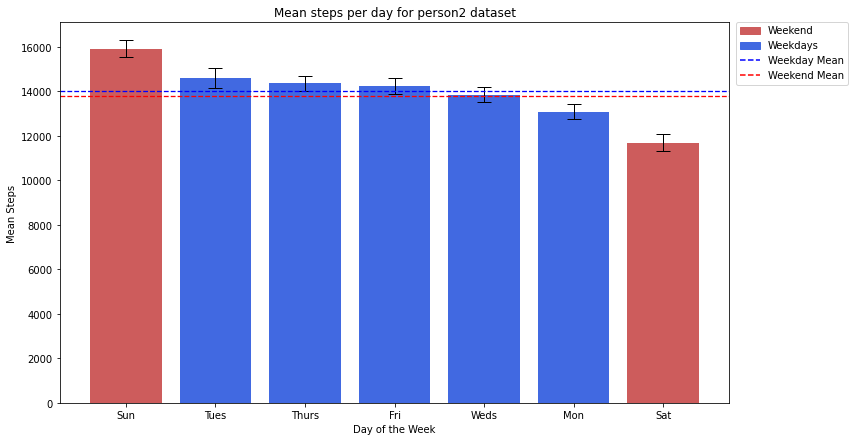

In [54]:
#graph means per day for person2 data set with error bars
plt.bar(day_mean_df2['Day'], day_mean_df2['Mean Steps'], color = ['indianred', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred'])
plt.errorbar(day_mean_df2['Day'], day_mean_df2['Mean Steps'], yerr=day_mean_df2['SEM'], capsize=7, elinewidth=1, markeredgewidth=1, color = 'black', ls='none')
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Mean Steps')
plt.title('Mean steps per day for person2 dataset')
#add weekday and weekend means
h1 = weekday_mean_df2[weekday_mean_df2['Period']=='Weekday']['Mean Steps'][1]
h2 = weekday_mean_df2[weekday_mean_df2['Period']=='Weekend']['Mean Steps'][0]
plt.axhline(y=h1,linewidth=1.3, linestyle='--', label='Weekday Mean', color='blue')
plt.axhline(y=h2,linewidth=1.3, linestyle='--', label='Weekend Mean', color='red')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue, hline1, hline2], loc='best', bbox_to_anchor=(0.585, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)
#save plot as image
fig.savefig('person2_meanperday.png', dpi=100)

In [28]:
#generate day of week frequency data for person1
day_freq1 = []
#group df1_daily by day of week
gdf1_daily = df1_daily.groupby('Day of Week')
#loop through groups to get count
dkeys1 = gdf1_daily.groups.keys()
for i in dkeys1:
    day_freq1.append([daydict[i], gdf1_daily.get_group(i)['Date'].count()])
day_freq_df1 = pd.DataFrame(day_freq1, columns=['Day', 'Count'])
day_freq_df1

,Day,Count
0,Mon,337
1,Tues,339
2,Weds,333
3,Thurs,340
4,Fri,342
5,Sat,287
6,Sun,317


In [29]:
#generate day of week frequency data for person2
day_freq2 = []
#group df1_daily by day of week
gdf2_daily = df2_daily.groupby('Day of Week')
#loop through groups to get count
dkeys2 = gdf2_daily.groups.keys()
for i in dkeys2:
    day_freq2.append([daydict[i], gdf2_daily.get_group(i)['Date'].count()])
day_freq_df2 = pd.DataFrame(day_freq2, columns=['Day', 'Count'])
day_freq_df2

,Day,Count
0,Mon,356
1,Tues,356
2,Weds,356
3,Thurs,355
4,Fri,355
5,Sat,356
6,Sun,356


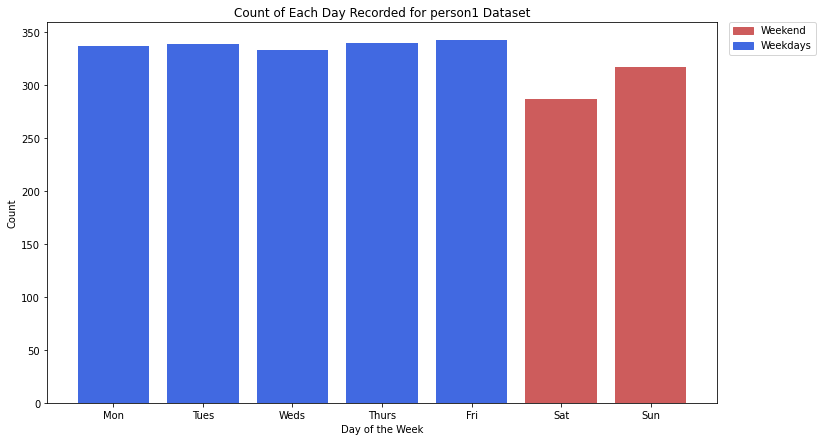

In [30]:
#graph count of each day for person1 data set
plt.bar(day_freq_df1['Day'], day_freq_df1['Count'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Each Day Recorded for person1 Dataset')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue], loc='best', bbox_to_anchor=(0.555, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)
#save plot as image
fig.savefig('person1_freqperday.png', dpi=100)

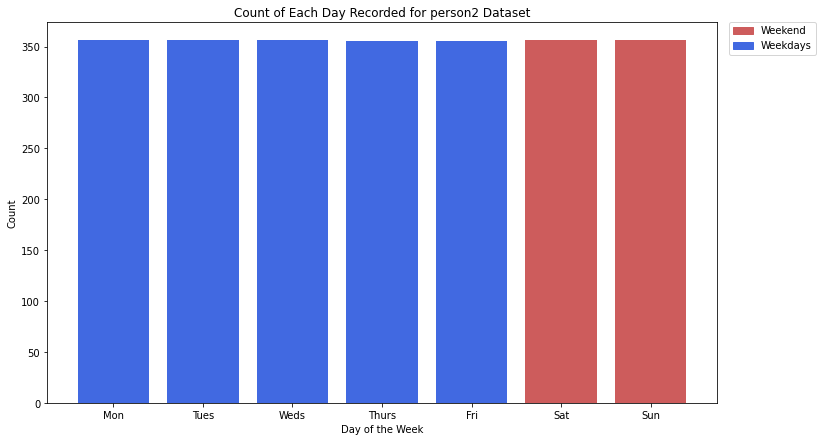

In [31]:
#graph count of each day for person1 data set
plt.bar(day_freq_df2['Day'], day_freq_df2['Count'], color = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'indianred', 'indianred'])
#set axis labels and titles
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Count of Each Day Recorded for person2 Dataset')
#create legend
patch_red = mpatches.Patch(color='indianred', label='Weekend')
patch_blue = mpatches.Patch(color='royalblue', label='Weekdays')
plt.legend(handles=[patch_red, patch_blue], loc='best', bbox_to_anchor=(0.555, 0.415, 0.6, 0.6))
#set plot size
fig = plt.gcf()
fig.set_size_inches(12, 7)
#save plot as image
fig.savefig('person2_freqperday.png', dpi=100)